In [5]:
pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv")

# Print the first few rows and the column names
print(df.columns)
print(df.head())

Index(['Unnamed: 0', 'NC_000962.3:3877464-3878507+287',
       'NC_000962.3:3877464-3878507+689', 'NC_000962.3:759807-763325+36',
       'NC_000962.3:759807-763325+97', 'NC_000962.3:759807-763325+132',
       'NC_000962.3:759807-763325+509', 'NC_000962.3:759807-763325+606',
       'NC_000962.3:759807-763325+673', 'NC_000962.3:759807-763325+696',
       'NC_000962.3:759807-763325+801', 'NC_000962.3:759807-763325+857',
       'NC_000962.3:759807-763325+1133', 'NC_000962.3:759807-763325+1289',
       'NC_000962.3:759807-763325+1303', 'NC_000962.3:759807-763325+1304',
       'NC_000962.3:759807-763325+1325', 'NC_000962.3:759807-763325+1333',
       'NC_000962.3:759807-763325+1334', 'NC_000962.3:759807-763325+1335',
       'NC_000962.3:759807-763325+1349', 'NC_000962.3:759807-763325+1471',
       'NC_000962.3:759807-763325+2014', 'NC_000962.3:759807-763325+2479',
       'NC_000962.3:759807-763325+2728', 'NC_000962.3:759807-763325+3189',
       'NC_000962.3:759807-763325+3225', 'NC_000962.3:

/var/folders/vf/y_gznmzd5zd6lcm5wvgk1qbm0000gp/T/ipykernel_29787/1804241173.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
# Drop the index column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Get only the nucleotide columns (excluding Sample, ID, Resistance)
nucleotide_cols = df.columns[:-3]


# we are creating the fasta file here - the fasta file is already created
# we taking the file we already downloaded two steps prior and saving it as a fasta file 
#joining the two columns from 
#data --> looping thorugh rows of data --> able to extract sequence ID becuase there a row iwth the colmn ID --> know what sequence is bc we take all 
#nucleodies in the row and joining them together 
#fasta is ^ ,  sequence id, ^
# Write to FASTA
with open("rpo_sequences.fasta", "w") as fasta_file:
    for idx, row in df.iterrows():
        seq_id = row['ID']
        sequence = ''.join([str(row[col]) for col in nucleotide_cols])
        fasta_file.write(f">{seq_id}\n{sequence}\n")


In [8]:
# Show first 3 entries of the FASTA file
with open("rpo_sequences.fasta") as f:
    for i in range(6):  # 2 lines per FASTA entry
        print(f.readline().strip())


>ERR4810461
TTTGTTCCCGCTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810467
CTTGTTCCCGTTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810478
TTTGTTCCCGCTTGAGCACTATCAGCCCATGCTGGGATGCACAGCCACTCTC


In [9]:
import os
print(os.listdir())


['Screenshot 2024-12-03 at 2.10.43\u202fPM (2).png', '4-1 (2).pdf', 'pandas&python_lessons.ipynb', 'solutions to sketches.pdf', 'Bundle%20of%20HW%20for%20the%20Year%20with%20QRCodes (1).pdf', 'Lord_of_the_Flies_Chapters_1-4.pdf', 'IMG_4792.HEIC', 'Pre-calculus Workbook (2).pdf', '12-2 course 4-1.pdf', 'Anya Khurana - Unit 3 Review - 18629919-3.pdf', 'Cumulative review #2-2.pdf', 'Horace_Greeley_HS-1.pdf', 'Anya Khurana - Unit 4 Review - 18629919.pdf', '103220_04152024_135035_22589049.PDF', 'Polynomial Functions Review Sheet.pdf', 'Text p. 198.pdf', 'Blank Review Slides (1).pdf', "Root's Perspecitve Writing Point of View - Anya Khurana - Course 1-2.pdf", 'annotated-New%20Copy%20of%20Holocaust%20Essay%20-%20Anya%20K-2.pdf', '83f3629537b5090b003722c63c9d744b98832c.doc', 'Finding Electron Configurations from the periodic Table.pdf', 'Anya Khurana - REAL Discussion 2 - 18629919.pdf', 'Sequences and Series pages.pdf', 'Slides answers for 1-26-22.pdf', '4-2 (4).pdf', 'IMG_4784.HEIC', 'WB L19.

In [10]:
with open("rpo_sequences.fasta") as f:
    lines = f.readlines()
    print(f"Number of lines in FASTA file: {len(lines)}")

    # Show the first few lines
    print("\n--- First 10 lines ---")
    for line in lines[:10]:
        print(line.strip())


Number of lines in FASTA file: 196

--- First 10 lines ---
>ERR4810461
TTTGTTCCCGCTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810467
CTTGTTCCCGTTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810478
TTTGTTCCCGCTTGAGCACTATCAGCCCATGCTGGGATGCACAGCCACTCTC
>ERR4810486
TTTGTTCCCGCTCGAGCAGCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810491
TTTGTTCCCGCTTGAGCACCATCGGTCCGTGCTGGGATGCACAGCCACTCTC


In [11]:
with open("rpo_sequences.fasta") as f:
    lines = f.readlines()
    print(f"Number of lines in FASTA file: {len(lines)}")
    print("\n--- First 6 lines ---")
    for line in lines[:6]:
        print(line.strip())


Number of lines in FASTA file: 196

--- First 6 lines ---
>ERR4810461
TTTGTTCCCGCTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810467
CTTGTTCCCGTTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810478
TTTGTTCCCGCTTGAGCACTATCAGCCCATGCTGGGATGCACAGCCACTCTC


In [12]:
from itertools import combinations

# Read sequences from the FASTA file
sequences = {}
with open("rpo_sequences.fasta") as f:
    lines = f.readlines()
    for i in range(0, len(lines), 2):  # Every 2 lines (header + sequence)
        header = lines[i].strip()
        sequence = lines[i+1].strip()
        sequences[header] = sequence

# Function to calculate Hamming distance
def hamming_distance(seq1, seq2):
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

# Calculate pairwise Hamming distances
distances = {}
for (header1, seq1), (header2, seq2) in combinations(sequences.items(), 2):
    distance = hamming_distance(seq1, seq2)
    distances[(header1, header2)] = distance

# Show the first 5 pairwise distances
for pair, dist in list(distances.items())[:5]:
    print(f"{pair[0]} vs {pair[1]}: Hamming distance = {dist}")


>ERR4810461 vs >ERR4810467: Hamming distance = 2
>ERR4810461 vs >ERR4810478: Hamming distance = 1
>ERR4810461 vs >ERR4810486: Hamming distance = 3
>ERR4810461 vs >ERR4810491: Hamming distance = 3
>ERR4810461 vs >ERR4810492: Hamming distance = 2


In [13]:
with open("hamming_distances.csv", "w") as f:
    f.write("Pair, Hamming Distance\n")
    for pair, dist in distances.items():
        f.write(f"{pair[0]} vs {pair[1]}, {dist}\n")


In [14]:
import os

# Set the working directory to where your project files are located
os.chdir("/Users/anyakhurana/Documents/Rpo_analysis_project")

# Check the current working directory
print(os.getcwd())

/Users/anyakhurana/Documents/Rpo_analysis_project


In [11]:
import os
print(os.getcwd())


/Users/anyakhurana/Documents/Rpo_analysis_project


In [15]:
# Define the full path to save the file (e.g., in the 'Documents' folder)
file_path = "/Users/anyakhurana/Documents/rpo_sequences.fasta"
with open(file_path, "w") as fasta_file:
    for idx, row in df.iterrows():
        seq_id = row['ID']
        sequence = ''.join([str(row[col]) for col in nucleotide_cols])
        fasta_file.write(f">{seq_id}\n{sequence}\n")


In [16]:
import os

# Set the working directory to where your project files are located
os.chdir("/Users/anyakhurana/Documents/rpo_sequences.fasta")

# Check the current working directory
print(os.getcwd())

NotADirectoryError: [Errno 20] Not a directory: '/Users/anyakhurana/Documents/rpo_sequences.fasta'

In [17]:
import pandas as pd

# Define the file paths
csv_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv"
fasta_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta"

# Load the CSV file
df = pd.read_csv(csv_file)

# Print the first few rows and the column names to verify the data
print("Columns in the CSV:", df.columns.tolist())
print("First few rows:")
print(df.head())

# Ensure the required columns are present (adjust these names if needed)
required_columns = ["Sample_ID", "Sequence", "Resistance"]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# Write the data to a FASTA file
with open(fasta_file, "w") as out:
    for _, row in df.iterrows():
        # Create a FASTA header, modify format if necessary
        header = f">sample_{row['Sample_ID']}_resistance_{row['Resistance']}"
        sequence = row['Sequence']
        out.write(header + "\n")
        out.write(sequence + "\n")

print(f"FASTA file '{fasta_file}' created successfully!")


Columns in the CSV: ['Unnamed: 0', 'NC_000962.3:3877464-3878507+287', 'NC_000962.3:3877464-3878507+689', 'NC_000962.3:759807-763325+36', 'NC_000962.3:759807-763325+97', 'NC_000962.3:759807-763325+132', 'NC_000962.3:759807-763325+509', 'NC_000962.3:759807-763325+606', 'NC_000962.3:759807-763325+673', 'NC_000962.3:759807-763325+696', 'NC_000962.3:759807-763325+801', 'NC_000962.3:759807-763325+857', 'NC_000962.3:759807-763325+1133', 'NC_000962.3:759807-763325+1289', 'NC_000962.3:759807-763325+1303', 'NC_000962.3:759807-763325+1304', 'NC_000962.3:759807-763325+1325', 'NC_000962.3:759807-763325+1333', 'NC_000962.3:759807-763325+1334', 'NC_000962.3:759807-763325+1335', 'NC_000962.3:759807-763325+1349', 'NC_000962.3:759807-763325+1471', 'NC_000962.3:759807-763325+2014', 'NC_000962.3:759807-763325+2479', 'NC_000962.3:759807-763325+2728', 'NC_000962.3:759807-763325+3189', 'NC_000962.3:759807-763325+3225', 'NC_000962.3:763370-767320+321', 'NC_000962.3:763370-767320+1204', 'NC_000962.3:763370-767

ValueError: Missing required column: Sample_ID

In [18]:
import pandas as pd

# Define file paths (update these paths if necessary)
csv_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv"
fasta_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta"

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Print the columns and first few rows so you can verify the data
print("CSV Columns:", df.columns.tolist())
print("First few rows:")
print(df.head())

# Check that necessary columns exist (update column names if needed)
required_columns = ["Sample_ID", "Sequence", "Resistance"]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# Create the FASTA file by iterating over the rows of the DataFrame
with open(fasta_file, "w") as out_file:
    for _, row in df.iterrows():
        # Create a FASTA header with the sample ID and resistance information
        header = f">sample_{row['Sample_ID']}_resistance_{row['Resistance']}"
        sequence = row['Sequence']
        # Write the header and sequence on separate lines
        out_file.write(header + "\n")
        out_file.write(sequence + "\n")

print(f"FASTA file '{fasta_file}' created successfully!")


CSV Columns: ['Unnamed: 0', 'NC_000962.3:3877464-3878507+287', 'NC_000962.3:3877464-3878507+689', 'NC_000962.3:759807-763325+36', 'NC_000962.3:759807-763325+97', 'NC_000962.3:759807-763325+132', 'NC_000962.3:759807-763325+509', 'NC_000962.3:759807-763325+606', 'NC_000962.3:759807-763325+673', 'NC_000962.3:759807-763325+696', 'NC_000962.3:759807-763325+801', 'NC_000962.3:759807-763325+857', 'NC_000962.3:759807-763325+1133', 'NC_000962.3:759807-763325+1289', 'NC_000962.3:759807-763325+1303', 'NC_000962.3:759807-763325+1304', 'NC_000962.3:759807-763325+1325', 'NC_000962.3:759807-763325+1333', 'NC_000962.3:759807-763325+1334', 'NC_000962.3:759807-763325+1335', 'NC_000962.3:759807-763325+1349', 'NC_000962.3:759807-763325+1471', 'NC_000962.3:759807-763325+2014', 'NC_000962.3:759807-763325+2479', 'NC_000962.3:759807-763325+2728', 'NC_000962.3:759807-763325+3189', 'NC_000962.3:759807-763325+3225', 'NC_000962.3:763370-767320+321', 'NC_000962.3:763370-767320+1204', 'NC_000962.3:763370-767320+129

ValueError: Missing required column: Sample_ID

In [19]:
import pandas as pd

# Define file paths
csv_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv"
fasta_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta"

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Print columns so you see their names
print("CSV Columns:", df.columns.tolist())
print("First few rows:")
print(df.head())

# Update the required columns list if needed.
# If your CSV uses 'id' instead of 'Sample_ID', update accordingly.
required_columns = ["id", "Sequence", "Resistance"]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# Create the FASTA file by iterating over the rows of the DataFrame
with open(fasta_file, "w") as out_file:
    for _, row in df.iterrows():
        # Use the updated column name ('id' here)
        header = f">sample_{row['id']}_resistance_{row['Resistance']}"
        sequence = row['Sequence']
        out_file.write(header + "\n")
        out_file.write(sequence + "\n")

print(f"FASTA file '{fasta_file}' created successfully!")


CSV Columns: ['Unnamed: 0', 'NC_000962.3:3877464-3878507+287', 'NC_000962.3:3877464-3878507+689', 'NC_000962.3:759807-763325+36', 'NC_000962.3:759807-763325+97', 'NC_000962.3:759807-763325+132', 'NC_000962.3:759807-763325+509', 'NC_000962.3:759807-763325+606', 'NC_000962.3:759807-763325+673', 'NC_000962.3:759807-763325+696', 'NC_000962.3:759807-763325+801', 'NC_000962.3:759807-763325+857', 'NC_000962.3:759807-763325+1133', 'NC_000962.3:759807-763325+1289', 'NC_000962.3:759807-763325+1303', 'NC_000962.3:759807-763325+1304', 'NC_000962.3:759807-763325+1325', 'NC_000962.3:759807-763325+1333', 'NC_000962.3:759807-763325+1334', 'NC_000962.3:759807-763325+1335', 'NC_000962.3:759807-763325+1349', 'NC_000962.3:759807-763325+1471', 'NC_000962.3:759807-763325+2014', 'NC_000962.3:759807-763325+2479', 'NC_000962.3:759807-763325+2728', 'NC_000962.3:759807-763325+3189', 'NC_000962.3:759807-763325+3225', 'NC_000962.3:763370-767320+321', 'NC_000962.3:763370-767320+1204', 'NC_000962.3:763370-767320+129

ValueError: Missing required column: id

In [20]:
import pandas as pd

csv_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv"
df = pd.read_csv(csv_file)
print("CSV Columns:", df.columns.tolist())


CSV Columns: ['Unnamed: 0', 'NC_000962.3:3877464-3878507+287', 'NC_000962.3:3877464-3878507+689', 'NC_000962.3:759807-763325+36', 'NC_000962.3:759807-763325+97', 'NC_000962.3:759807-763325+132', 'NC_000962.3:759807-763325+509', 'NC_000962.3:759807-763325+606', 'NC_000962.3:759807-763325+673', 'NC_000962.3:759807-763325+696', 'NC_000962.3:759807-763325+801', 'NC_000962.3:759807-763325+857', 'NC_000962.3:759807-763325+1133', 'NC_000962.3:759807-763325+1289', 'NC_000962.3:759807-763325+1303', 'NC_000962.3:759807-763325+1304', 'NC_000962.3:759807-763325+1325', 'NC_000962.3:759807-763325+1333', 'NC_000962.3:759807-763325+1334', 'NC_000962.3:759807-763325+1335', 'NC_000962.3:759807-763325+1349', 'NC_000962.3:759807-763325+1471', 'NC_000962.3:759807-763325+2014', 'NC_000962.3:759807-763325+2479', 'NC_000962.3:759807-763325+2728', 'NC_000962.3:759807-763325+3189', 'NC_000962.3:759807-763325+3225', 'NC_000962.3:763370-767320+321', 'NC_000962.3:763370-767320+1204', 'NC_000962.3:763370-767320+129

In [21]:
import pandas as pd

# Define file paths (update these paths if necessary)
csv_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv"
fasta_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta"

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Print the columns and first few rows so you can verify the data
print("CSV Columns:", df.columns.tolist())
print("First few rows:")
print(df.head())

# Choose the correct column names based on your CSV
# Use "ID" as the sample identifier, the coordinate column as the sequence, and "Resistance" for labeling.
identifier_col = "ID"
sequence_col = "NC_000962.3:3877464-3878507+287"  # Change this if you want a different sequence column
resistance_col = "Resistance"

# Ensure that the necessary columns are present
required_columns = [identifier_col, sequence_col, resistance_col]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# Create the FASTA file by iterating over the rows of the DataFrame
with open(fasta_file, "w") as out_file:
    for _, row in df.iterrows():
        # Create a FASTA header with the sample identifier and resistance information
        header = f">sample_{row[identifier_col]}_resistance_{row[resistance_col]}"
        sequence = row[sequence_col]
        out_file.write(header + "\n")
        out_file.write(sequence + "\n")

print(f"FASTA file '{fasta_file}' created successfully!")


CSV Columns: ['Unnamed: 0', 'NC_000962.3:3877464-3878507+287', 'NC_000962.3:3877464-3878507+689', 'NC_000962.3:759807-763325+36', 'NC_000962.3:759807-763325+97', 'NC_000962.3:759807-763325+132', 'NC_000962.3:759807-763325+509', 'NC_000962.3:759807-763325+606', 'NC_000962.3:759807-763325+673', 'NC_000962.3:759807-763325+696', 'NC_000962.3:759807-763325+801', 'NC_000962.3:759807-763325+857', 'NC_000962.3:759807-763325+1133', 'NC_000962.3:759807-763325+1289', 'NC_000962.3:759807-763325+1303', 'NC_000962.3:759807-763325+1304', 'NC_000962.3:759807-763325+1325', 'NC_000962.3:759807-763325+1333', 'NC_000962.3:759807-763325+1334', 'NC_000962.3:759807-763325+1335', 'NC_000962.3:759807-763325+1349', 'NC_000962.3:759807-763325+1471', 'NC_000962.3:759807-763325+2014', 'NC_000962.3:759807-763325+2479', 'NC_000962.3:759807-763325+2728', 'NC_000962.3:759807-763325+3189', 'NC_000962.3:759807-763325+3225', 'NC_000962.3:763370-767320+321', 'NC_000962.3:763370-767320+1204', 'NC_000962.3:763370-767320+129

In [22]:
print(df.shape)

(98, 56)


In [23]:
print(df.iloc[0])

Unnamed: 0                                  0
NC_000962.3:3877464-3878507+287             T
NC_000962.3:3877464-3878507+689             T
NC_000962.3:759807-763325+36                T
NC_000962.3:759807-763325+97                G
NC_000962.3:759807-763325+132               T
NC_000962.3:759807-763325+509               T
NC_000962.3:759807-763325+606               C
NC_000962.3:759807-763325+673               C
NC_000962.3:759807-763325+696               C
NC_000962.3:759807-763325+801               G
NC_000962.3:759807-763325+857               C
NC_000962.3:759807-763325+1133              T
NC_000962.3:759807-763325+1289              T
NC_000962.3:759807-763325+1303              G
NC_000962.3:759807-763325+1304              A
NC_000962.3:759807-763325+1325              G
NC_000962.3:759807-763325+1333              C
NC_000962.3:759807-763325+1334              A
NC_000962.3:759807-763325+1335              C
NC_000962.3:759807-763325+1349              T
NC_000962.3:759807-763325+1471    

In [24]:
import pandas as pd

# Load your data
csv_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv"
df = pd.read_csv(csv_file)

# Define output FASTA path
fasta_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta"

# Get the mutation columns (everything between Unnamed:0 and Resistance)
mutation_cols = df.columns[1:-3]  # Skip 'Unnamed: 0', 'Sample', 'ID', 'Resistance'

# Write to FASTA
with open(fasta_file, "w") as out_file:
    for idx, row in df.iterrows():
        sample_id = row['ID']
        resistance = row['Resistance']
        sequence = ''.join(row[col] for col in mutation_cols)

        header = f">sample_{sample_id}_resistance_{resistance}"
        out_file.write(header + "\n")
        out_file.write(sequence + "\n")

print(f"✅ FASTA file created: {fasta_file}")


✅ FASTA file created: /Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta


## Philogentic Tree Code Part

In [25]:
install.packages("ggtree")
install.packages("treeio")
install.packages("ggplot2")

NameError: name 'install' is not defined

In [26]:
pip install biopython


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


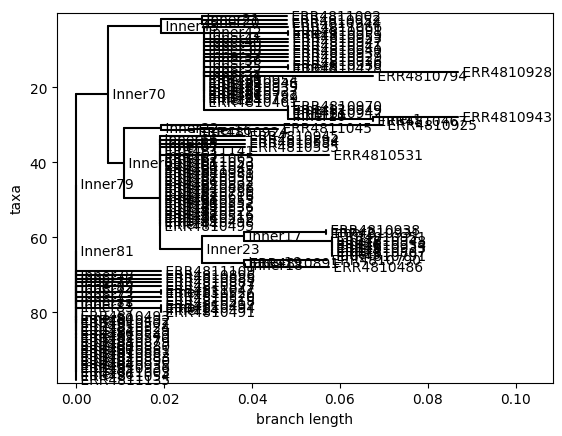

Phylogenetic tree saved as 'phylogenetic_tree.nwk'


In [29]:
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

# Load the FASTA file
alignment = AlignIO.read("rpo_sequences.fasta", "fasta")

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(alignment)

# Construct the phylogenetic tree using the Neighbor-Joining method
constructor = DistanceTreeConstructor(calculator, method="nj")
tree = constructor.build_tree(alignment)

# Visualize the tree
Phylo.draw(tree)

# Save the tree to a file
Phylo.write(tree, "phylogenetic_tree.nwk", "newick")
print("Phylogenetic tree saved as 'phylogenetic_tree.nwk'")

In [28]:
with open("rpo_sequences.fasta") as f:
    print(f.read())

>ERR4810461
TTTGTTCCCGCTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810467
CTTGTTCCCGTTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810478
TTTGTTCCCGCTTGAGCACTATCAGCCCATGCTGGGATGCACAGCCACTCTC
>ERR4810486
TTTGTTCCCGCTCGAGCAGCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810491
TTTGTTCCCGCTTGAGCACCATCGGTCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810492
TTTGTTCCCGCTTGAGCACCATCAGTCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810493
TTTGTTCCCGCTTGAGCACCATCAGTCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810494
TTTGTTCCCGCTTGAGCACCATCGGTCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810495
TTTGTTCCCGCTTGAGCACCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810497
TTTGTTCCCGCTTGAGCACCATCGGTCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810498
TTTGTTCCCGCTTGAGCACCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810507
TTTGTTCCCGCTTGAGCACCATCAGTCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810512
TTTGTTCCCGCTTGAGCACCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810516
TTTGTTCCCGCTTGAGCACCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810518
TTTGTTCCCGCTTGAGCACCATCAGTTCGTGCTGGGATGCACAGCCACTCTC
>ERR4810520
TTTGTTCCCGCTT

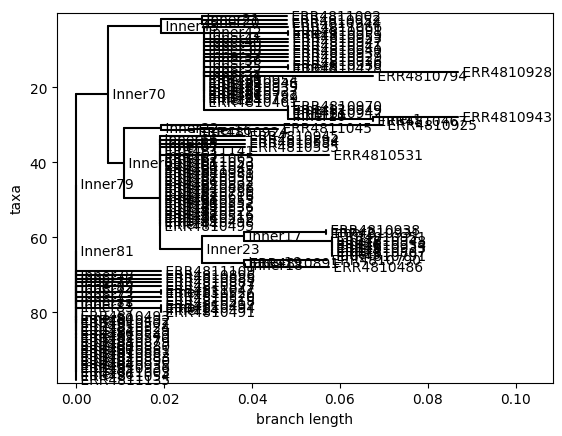

Phylogenetic tree saved as 'phylogenetic_tree.nwk'


In [30]:
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

# Load the FASTA file
alignment = AlignIO.read("rpo_sequences.fasta", "fasta")

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(alignment)

# Construct the phylogenetic tree using the Neighbor-Joining method
constructor = DistanceTreeConstructor(calculator, method="nj")
tree = constructor.build_tree(alignment)

# Visualize the tree
Phylo.draw(tree)

# Save the tree to a file in Newick format
Phylo.write(tree, "phylogenetic_tree.nwk", "newick")
print("Phylogenetic tree saved as 'phylogenetic_tree.nwk'")

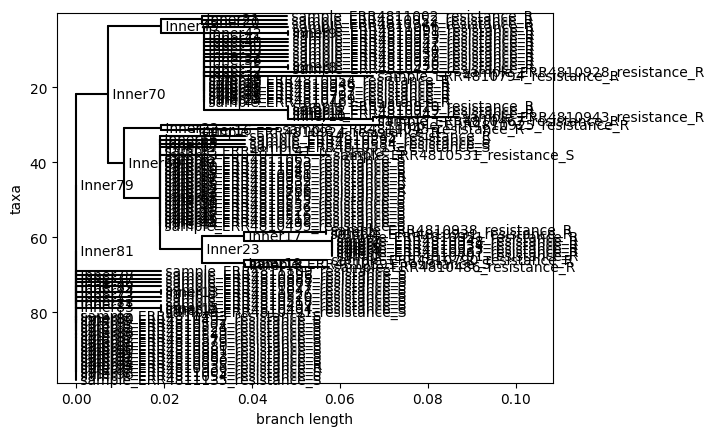

Phylogenetic tree saved as: /Users/anyakhurana/Documents/Rpo_analysis_project/phylogenetic_tree.nwk


In [ ]:
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

# Load the FASTA file
alignment = AlignIO.read("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta", "fasta")

# Calculate the distance matrix
calculator = DistanceCalculator("identity")
distance_matrix = calculator.get_distance(alignment)

# Construct the phylogenetic tree using the Neighbor-Joining method
constructor = DistanceTreeConstructor(calculator, method="nj")
tree = constructor.build_tree(alignment)

# Visualize the tree
Phylo.draw(tree)

# Save the tree to a file
tree_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/phylogenetic_tree.nwk"
Phylo.write(tree, tree_file, "newick")
print(f"Phylogenetic tree saved as: {tree_file}")

In [ ]:
with open("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta") as f:
    lines = f.readlines()
    for i in range(0, len(lines), 2):  # Check every header and sequence pair
        print(f"Header: {lines[i].strip()}")
        print(f"Sequence: {lines[i+1].strip()}")

Header: >sample_ERR4810461_resistance_R
Sequence: TTTGTTCCCGCTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810467_resistance_R
Sequence: CTTGTTCCCGTTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810478_resistance_R
Sequence: TTTGTTCCCGCTTGAGCACTATCAGCCCATGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810486_resistance_R
Sequence: TTTGTTCCCGCTCGAGCAGCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810491_resistance_S
Sequence: TTTGTTCCCGCTTGAGCACCATCGGTCCGTGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810492_resistance_S
Sequence: TTTGTTCCCGCTTGAGCACCATCAGTCCGTGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810493_resistance_S
Sequence: TTTGTTCCCGCTTGAGCACCATCAGTCCGTGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810494_resistance_S
Sequence: TTTGTTCCCGCTTGAGCACCATCGGTCCGTGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810495_resistance_S
Sequence: TTTGTTCCCGCTTGAGCACCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810497_resistance_S
Sequence: TTTGTTCCCGCTTGAGCACCATC

In [35]:
from collections import Counter

sequences = {}
with open("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta") as f:
    lines = f.readlines()
    for i in range(0, len(lines), 2):
        header = lines[i].strip()
        sequence = lines[i+1].strip()
        sequences[header] = sequence

duplicates = [seq for seq, count in Counter(sequences.values()).items() if count > 1]
print(f"Number of duplicate sequences: {len(duplicates)}")

Number of duplicate sequences: 10


In [36]:
from collections import Counter

sequences = {}
with open("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta") as f:
    lines = f.readlines()
    for i in range(0, len(lines), 2):
        header = lines[i].strip()
        sequence = lines[i+1].strip()
        sequences[header] = sequence

duplicates = [seq for seq, count in Counter(sequences.values()).items() if count > 1]
print(f"Number of duplicate sequences: {len(duplicates)}")
print("\nDuplicate sequences:")
for seq in duplicates:
    print(seq)

Number of duplicate sequences: 10

Duplicate sequences:
TTTGTTCCCGCTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
TTTGTTCCCGCTTGAGCACTATCAGCCCATGCTGGGATGCACAGCCACTCTC
TTTGTTCCCGCTTGAGCACCATCGGTCCGTGCTGGGATGCACAGCCACTCTC
TTTGTTCCCGCTTGAGCACCATCAGTCCGTGCTGGGATGCACAGCCACTCTC
TTTGTTCCCGCTTGAGCACCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
TTTGTTCCTGCTTGAGCACCATCAGTCCGTGCTGGGATGCACAGCCACTCTC
TTTGTTCCCGCTTGGGCACCCTCAGCCCGTGCTGGGATGCACAGCCACTCTC
TTTGTTCCCGCTCGGGCACCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
TTTGTTCCCGTTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
TTTGTTCCCGCTTGAGCACTATCAGCCCGTGCGGGGATGCACAGCCACTCTC


In [37]:
unique_sequences = {}
with open("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta") as f:
    lines = f.readlines()
    for i in range(0, len(lines), 2):
        header = lines[i].strip()
        sequence = lines[i+1].strip()
        if sequence not in unique_sequences.values():
            unique_sequences[header] = sequence

# Write the unique sequences to a new FASTA file
with open("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants_unique.fasta", "w") as f:
    for header, sequence in unique_sequences.items():
        f.write(f"{header}\n{sequence}\n")

print("Unique FASTA file created: rpoABC_variants_unique.fasta")

Unique FASTA file created: rpoABC_variants_unique.fasta


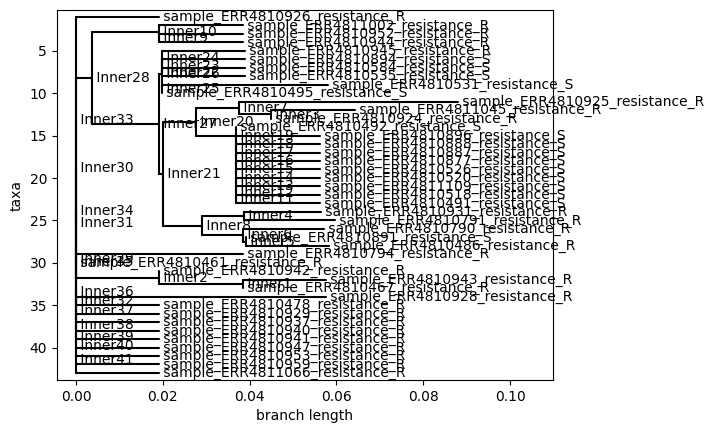

Phylogenetic tree saved as: /Users/anyakhurana/Documents/Rpo_analysis_project/phylogenetic_tree.nwk


In [40]:
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

# Load the aligned FASTA file
alignment = AlignIO.read("/Users/anyakhurana/Documents/Rpo_analysis_project/aligned_sequences.fasta", "fasta")

# Calculate the distance matrix
calculator = DistanceCalculator("identity")
distance_matrix = calculator.get_distance(alignment)

# Construct the phylogenetic tree using the Neighbor-Joining method
constructor = DistanceTreeConstructor(calculator, method="nj")
tree = constructor.build_tree(alignment)

# Visualize the tree
Phylo.draw(tree)

# Save the tree to a file
tree_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/phylogenetic_tree.nwk"
Phylo.write(tree, tree_file, "newick")
print(f"Phylogenetic tree saved as: {tree_file}")

In [42]:
library(ggtree)
library(treeio)

# Load the tree
tree <- read.tree("/Users/anyakhurana/Documents/Rpo_analysis_project/phylogenetic_tree.nwk")

# Extract resistance information from the labels
tree_data <- as_tibble(tree)
tree_data <- tree_data %>%
    mutate(Resistance = ifelse(grepl("_resistance_R", label), "R", "S"))

# Visualize the tree with resistance labels
ggtree(tree) +
    geom_tiplab(aes(label = Resistance), size = 3) +
    theme_tree2()

SyntaxError: invalid syntax (432029563.py, line 9)